In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
dataset = pd.read_csv('data/kidney_disease.csv')

In [3]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
dataset.shape

(400, 26)

In [6]:
dataset.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
dataset.drop(columns= ["id"],axis= 1, inplace=True)

In [8]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Data Pre-processing

### Checking and Handling missing value

In [9]:
dataset.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [10]:
((dataset.isnull().sum())/(dataset.shape[0] * dataset.shape[1])) * 100

age                        0.09
blood_pressure             0.12
specific_gravity           0.47
albumin                    0.46
sugar                      0.49
red_blood_cells            1.52
pus_cell                   0.65
pus_cell_clumps            0.04
bacteria                   0.04
blood_glucose_random       0.44
blood_urea                 0.19
serum_creatinine           0.17
sodium                     0.87
potassium                  0.88
haemoglobin                0.52
packed_cell_volume         0.70
white_blood_cell_count     1.05
red_blood_cell_count       1.30
hypertension               0.02
diabetes_mellitus          0.02
coronary_artery_disease    0.02
appetite                   0.01
peda_edema                 0.01
aanemia                    0.01
class                      0.00
dtype: float64

In [11]:
numerical_features = dataset.select_dtypes(exclude= "object").columns
categorical_features = dataset.select_dtypes(include= "object").columns

In [12]:
numerical_features

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin'],
      dtype='object')

In [13]:
categorical_features

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [14]:
def distribution_plot(numerical_features, rows, columns, dataset):
    plt.figure(figsize= (25, 22))
    for i in range(len(numerical_features)):
        plt.subplot(rows, columns, i+1)
        sns.histplot(x= dataset[numerical_features[i]], data= dataset, kde= True)
    plt.show()

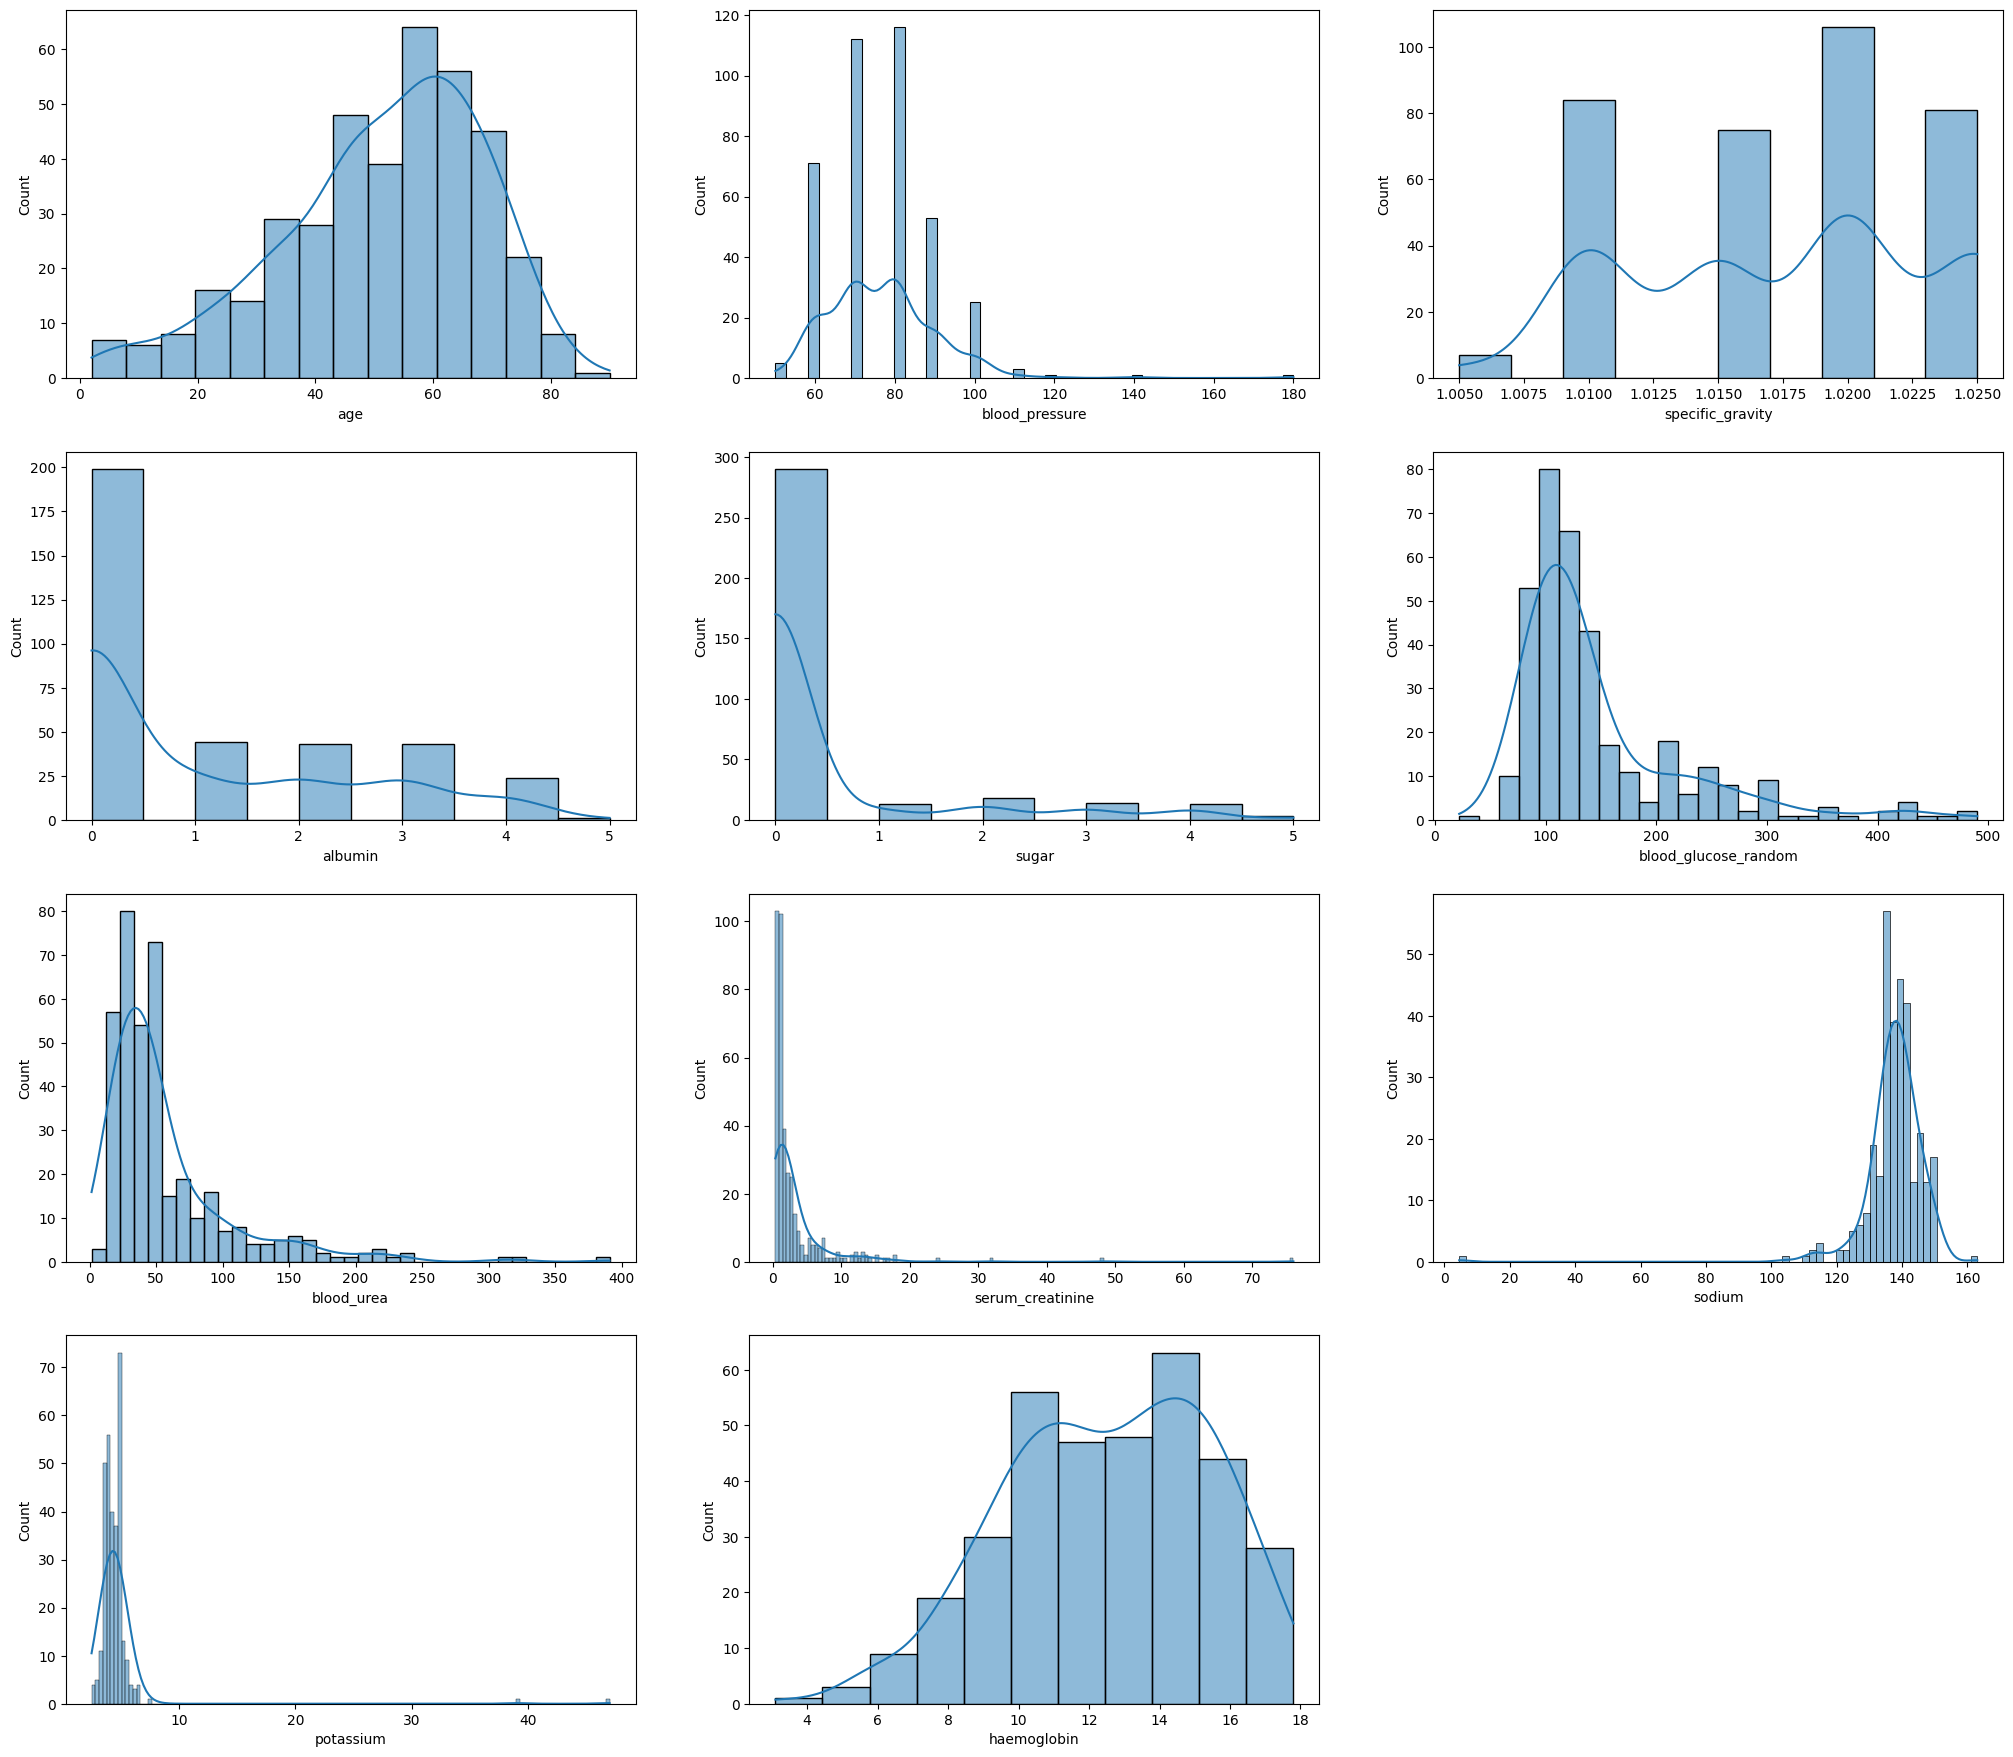

In [15]:
distribution_plot(numerical_features, 4, 3, dataset)

### Since most of the features have random distribution, so while filling the missing value it is good to use median instead of mean

In [16]:
def filling_missing_values(numerical_features, categorical_features, dataset):
    for feature in numerical_features:
        dataset[feature] = dataset[feature].fillna(dataset[feature].median())

    for feature in categorical_features:
        dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0])

    return dataset

In [17]:
dataset= filling_missing_values(numerical_features, categorical_features, dataset)

In [18]:
dataset.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### Checking and Handling Outliers

In [19]:
dataset.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000


In [20]:
def plotting_outlier(numerical_features, rows, columns, dataset):
    plt.figure(figsize=(20, 16))
    for i in range(len(numerical_features)):
        plt.subplot(rows, columns, i+1)
        sns.boxplot(x= numerical_features[i], data= dataset)

    plt.show()

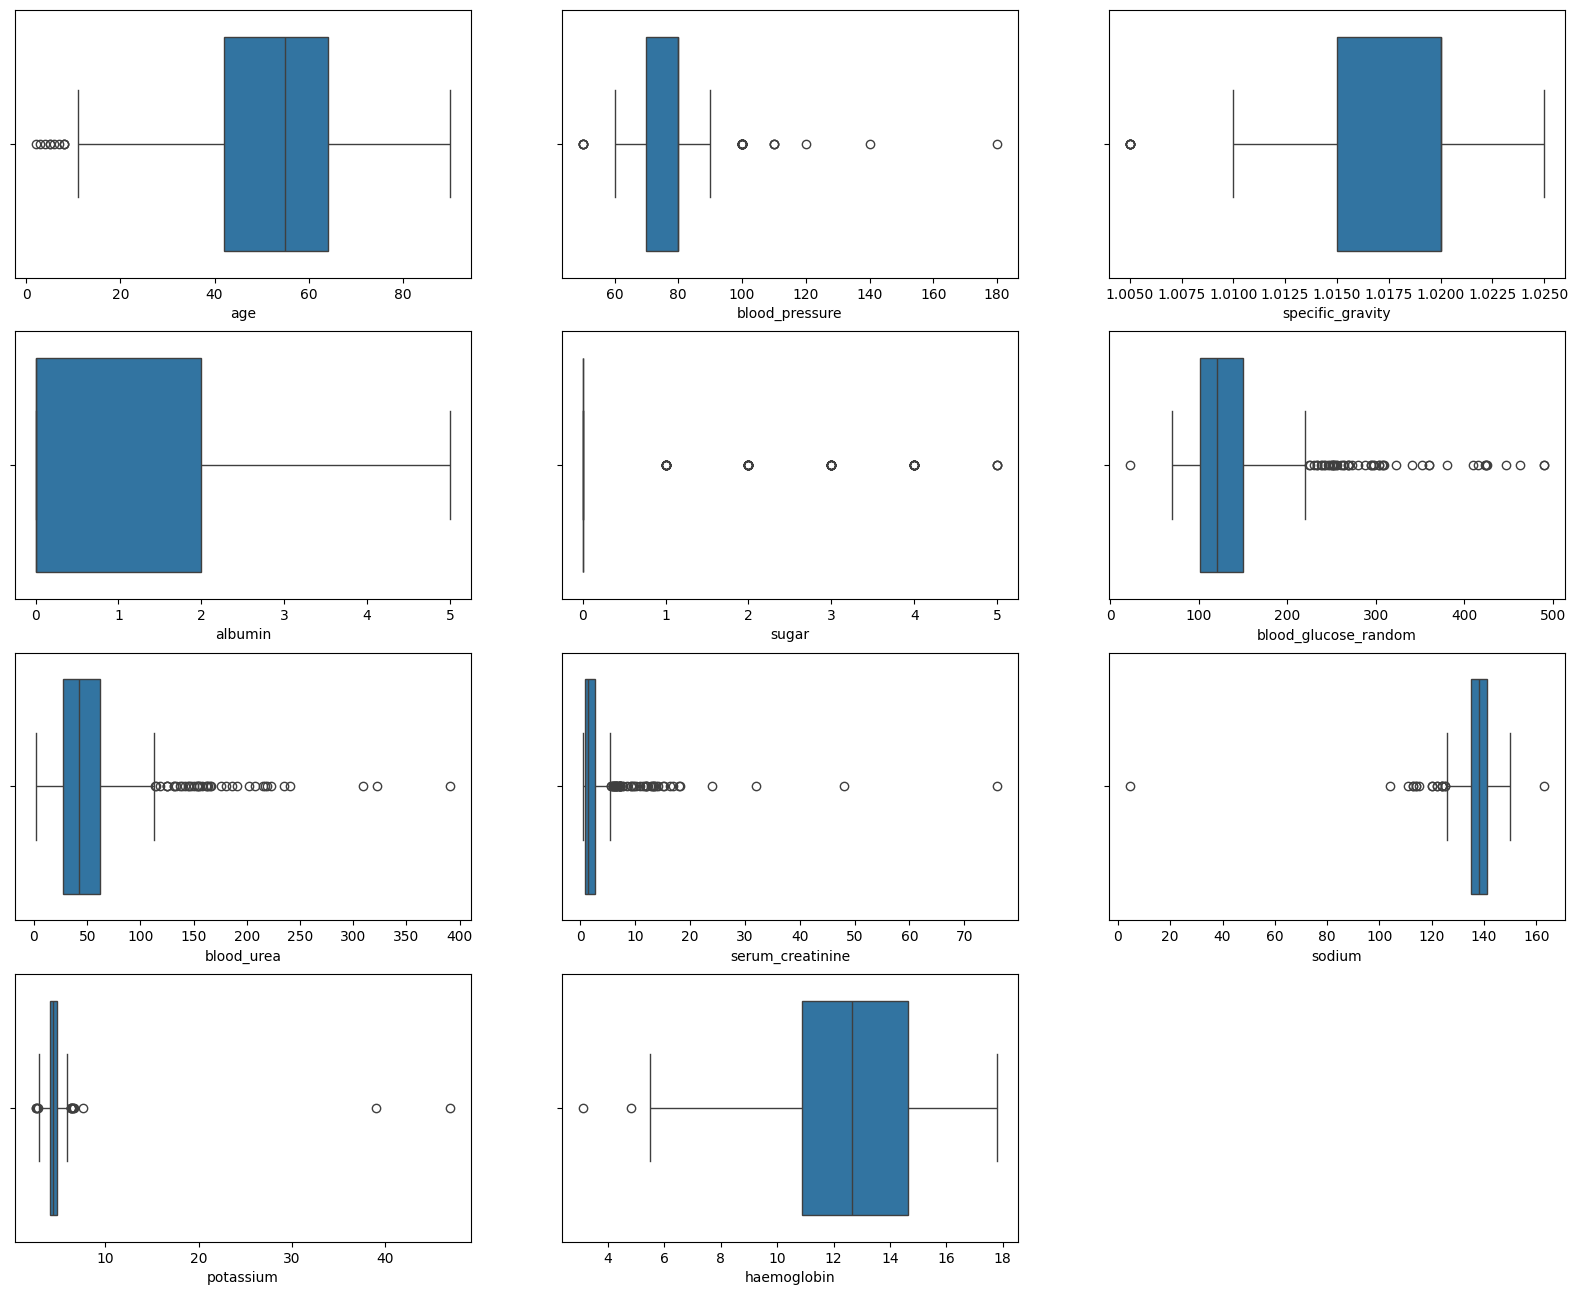

In [21]:
plotting_outlier(numerical_features, 4, 3, dataset)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
for feature in numerical_features:
    dataset[feature] = scaler.fit_transform(dataset[[feature]])

### Checking and Handling Duplicate Values

In [23]:
dataset.duplicated().sum()

np.int64(0)

### Encoing categorical columns

In [24]:
categorical_features

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [25]:
dataset['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [26]:
mapping = {'notckd' : 0, 'ckd' : 1, 'ckd\t' : 2}

dataset['class'] = dataset['class'].apply(lambda x:mapping[x])

In [27]:
dataset['class'].value_counts()

class
1    248
0    150
2      2
Name: count, dtype: int64

In [28]:
dataset['class'] = dataset['class'].replace(2, 1)

In [29]:
dataset['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [30]:
def categorical_feature(categorical_features, dataset):
    plt.figure(figsize= (25, 18))
    for i in range(len(categorical_features)):
        plt.subplot(5, 3, i+1)
        dataset[categorical_features[i]].value_counts().plot(kind= 'bar')
    plt.show()

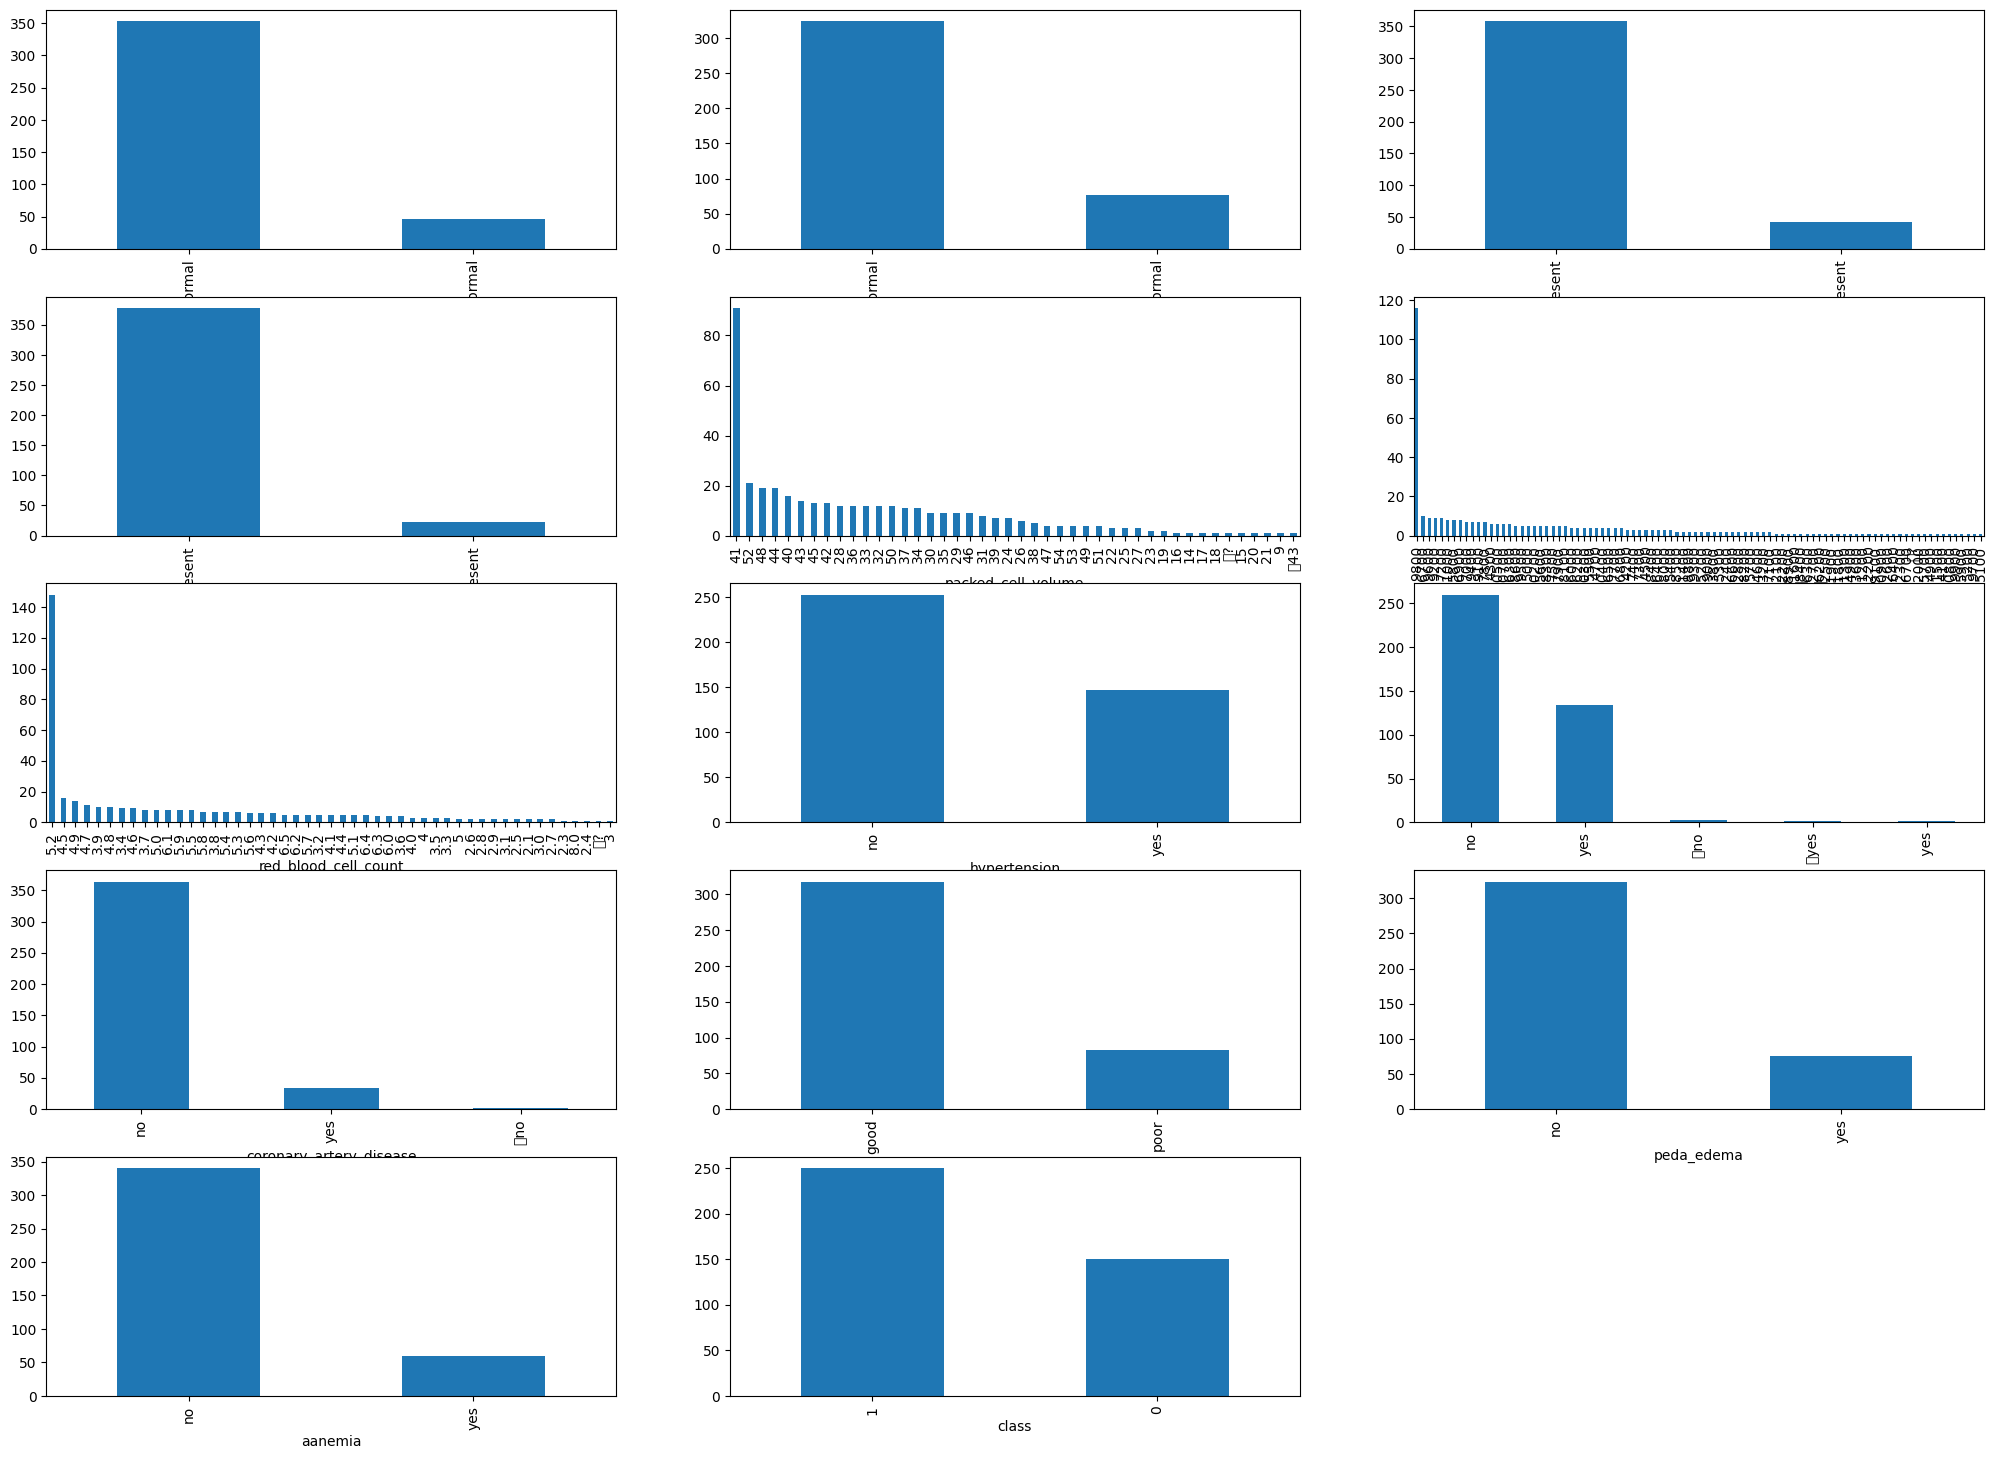

In [31]:
categorical_feature(categorical_features, dataset)

In [32]:
categorical_features.drop('class')

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for feature in categorical_features:
    dataset[feature] = encoder.fit_transform(dataset[[feature]])

In [34]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,-0.320122,...,32,72,34,1,4,1,0,0,0,1
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,-0.320122,...,26,56,34,0,3,1,0,0,0,1
2,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,3.697618,...,19,70,34,0,4,1,1,0,1,1
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,-0.373337,...,20,62,19,1,3,1,1,1,1,1
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,-0.519679,...,23,68,27,0,3,1,0,0,0,1


## EDA

### Correlation 

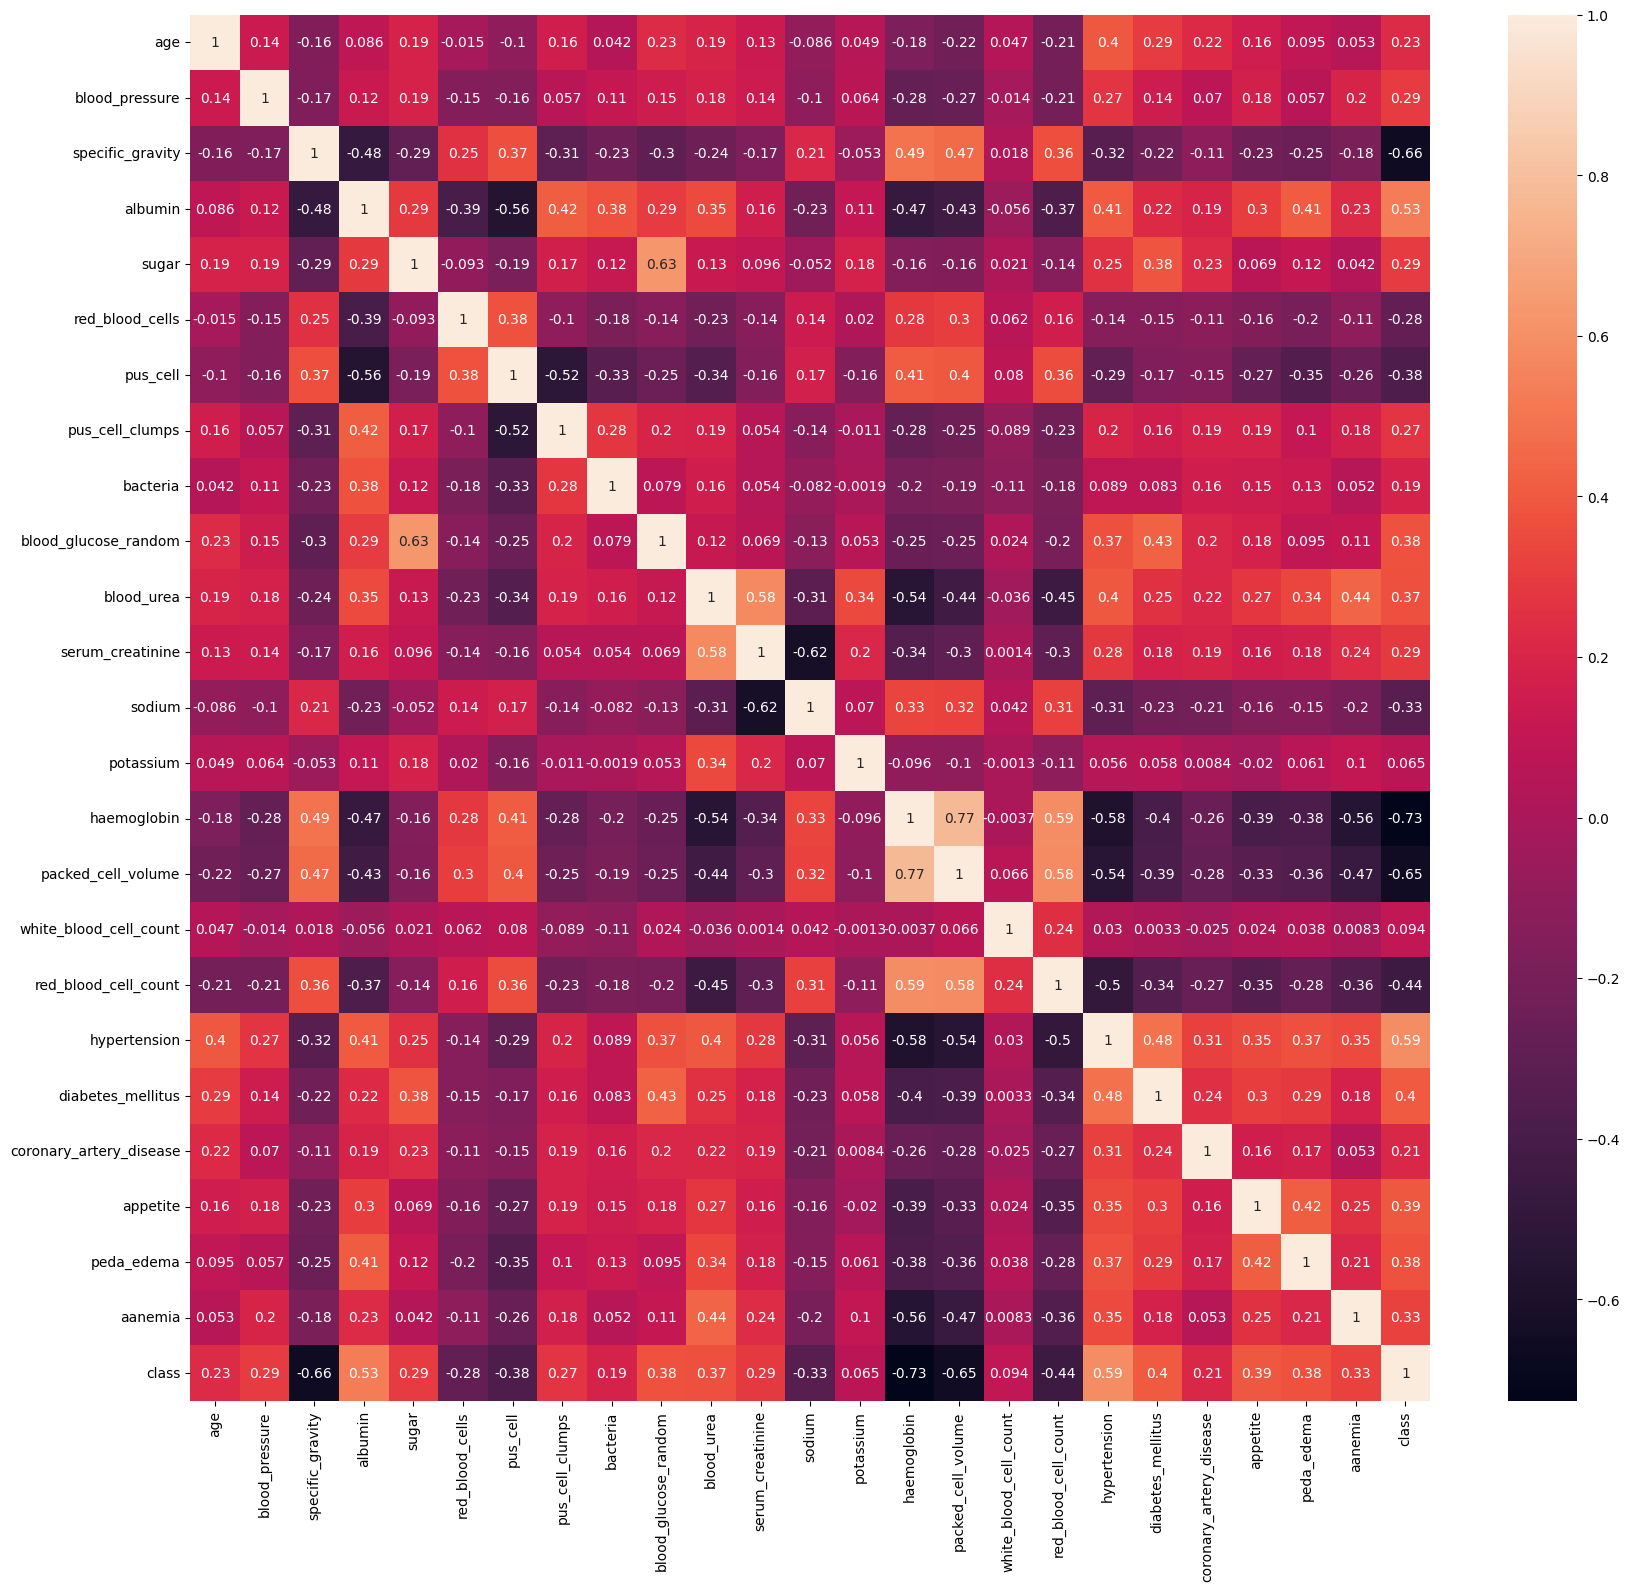

In [35]:
plt.figure(figsize=(20, 18))
sns.heatmap(dataset.corr(), annot= True)
plt.show()

### Train and Test Split

In [36]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,-0.320122,...,32,72,34,1,4,1,0,0,0,1
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,-0.320122,...,26,56,34,0,3,1,0,0,0,1
2,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,3.697618,...,19,70,34,0,4,1,1,0,1,1
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,-0.373337,...,20,62,19,1,3,1,1,1,1,1
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,-0.519679,...,23,68,27,0,3,1,0,0,0,1


In [37]:
X = dataset.drop(columns=["class"], axis= 1)
y = dataset['class']

In [38]:
X.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,-0.320122,...,1.053226,32,72,34,1,4,1,0,0,0
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,-0.320122,...,-0.457965,26,56,34,0,3,1,0,0,0
2,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,3.697618,...,-1.084556,19,70,34,0,4,1,1,0,1
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,-0.373337,...,-0.494823,20,62,19,1,3,1,1,1,1
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,-0.519679,...,-0.347390,23,68,27,0,3,1,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 24)
(320,)
(80, 24)
(80,)


## Model Building

In [41]:
models = []
accuracies = []

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_train_lr = lr_model.predict(X_train)
y_test_lr = lr_model.predict(X_test)

lr_train_accuracy = accuracy_score(y_train, y_train_lr)
lr_test_accuracy = accuracy_score(y_test, y_test_lr)

models.append('Logistic Regression')
accuracies.append(lr_test_accuracy)

print(f"Model train accuracy score : {lr_train_accuracy}%")
print(f"Model test accuracy score : {lr_test_accuracy}%")

Model train accuracy score : 0.99375%
Model test accuracy score : 1.0%


In [45]:
print(classification_report(y_test, y_test_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



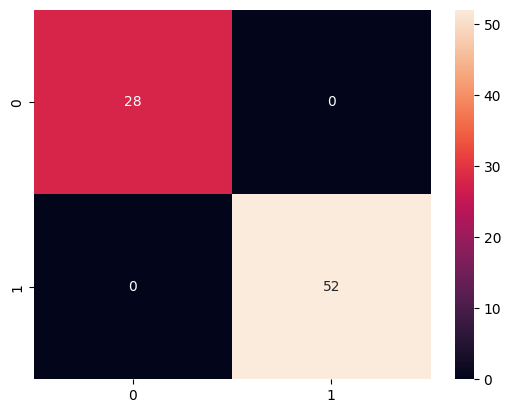

In [46]:
clf_lr = confusion_matrix(y_test, y_test_lr)
sns.heatmap(clf_lr, annot=True)
plt.show()

### SVM

In [47]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [48]:
y_train_svm = svm_model.predict(X_train)
y_test_svm = svm_model.predict(X_test)

svm_train_accuracy = accuracy_score(y_train, y_train_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_svm)

models.append('SVM')
accuracies.append(svm_test_accuracy)

print(f"Model train accuracy score : {svm_train_accuracy}%")
print(f"Model test accuracy score : {svm_test_accuracy}%")

Model train accuracy score : 0.859375%
Model test accuracy score : 0.9125%


In [49]:
print(classification_report(y_test, y_test_svm))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.92      0.94      0.93        52

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



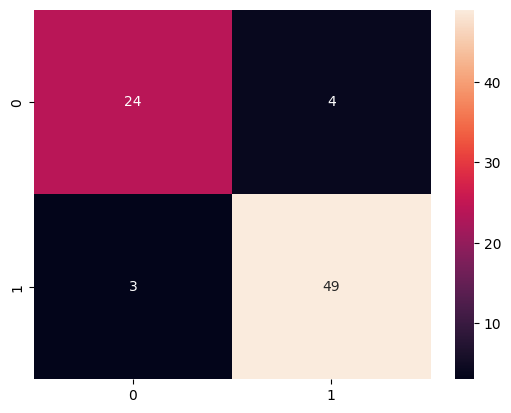

In [50]:
clf_svm= confusion_matrix(y_test, y_test_svm)
sns.heatmap(clf_svm, annot= True)
plt.show()

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, y_train_dt)
dt_test_accuracy = accuracy_score(y_test, y_test_dt)

models.append('Decision Tree')
accuracies.append(dt_test_accuracy)

print(f"Model train accuracy score : {dt_train_accuracy}%")
print(f"Model test accuracy score : {dt_test_accuracy}%")

Model train accuracy score : 1.0%
Model test accuracy score : 1.0%


In [53]:
print(classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



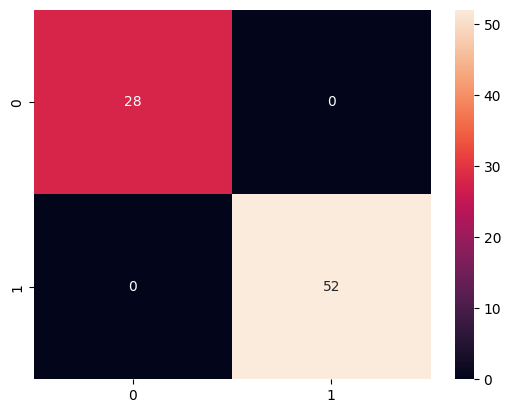

In [55]:
clf_dt = confusion_matrix(y_test, y_test_dt)
sns.heatmap(clf_dt, annot= True)
plt.show()

### Model Selection

In [62]:
models

['Logistic Regression', 'SVM', 'Decision Tree']

In [63]:
accuracies

[1.0, 0.9125, 1.0]

In [65]:
results= pd.DataFrame({"Model" : models, "Score" : accuracies})
results.sort_values(by="Score", ascending= False)

,Model,Score
0,Logistic Regression,1.0000
2,Decision Tree,1.0000
1,SVM,0.9125


ValueError: Filler values must be provided when X has more than 2 training features.

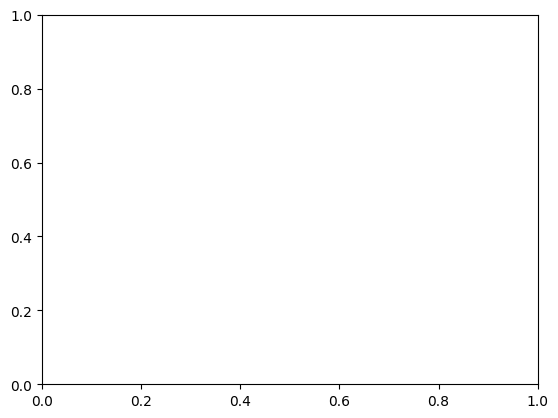

In [67]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf= dt_model)
plt.show()